In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Input, Flatten, Reshape,Activation

In [2]:
from noisify import noise_gen, noisify

In [3]:
latent_dim = 64
EPOCHS = 12

In [4]:
encoder = Sequential([
    Flatten(input_shape=(28,28)),
    Dropout(0.5),
    Dense(latent_dim)
])

In [5]:
decoder = Sequential([
    Dense(784),
    Activation('sigmoid'),
    Reshape((28,28))
])

In [7]:
img = Input(shape=(28,28))

In [8]:
latent_vec = encoder(img)
output = decoder(latent_vec)

In [9]:
model = Model(inputs = img, outputs = output)

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

In [11]:
mnist = tf.keras.datasets.mnist # 28x28 image of digits

(x_train,y_train), (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [12]:
n_train = noisify(x_train,28,28,0.75)
n_test = noisify(x_test,28,28,0.75)

In [13]:
loss_trend = []

for i in range(EPOCHS):
    print("Traing epoch {}".format(i + 1))
    model.fit(x_train,x_train,epochs=1,validation_data=(n_test,x_test),batch_size=256)
    print("Validating epoch {}".format(i + 1))
    loss_trend.append(model.evaluate(n_test,x_test))

Traing epoch 1
235/235 [==============================] - 3s 9ms/step - loss: 0.2164 - val_loss: 0.1628
Validating epoch 1
313/313 [==============================] - 0s 1ms/step - loss: 0.1628
Traing epoch 2
235/235 [==============================] - 4s 16ms/step - loss: 0.1534 - val_loss: 0.1499
Validating epoch 2
313/313 [==============================] - 1s 2ms/step - loss: 0.1499
Traing epoch 3
235/235 [==============================] - 3s 12ms/step - loss: 0.1439 - val_loss: 0.1448
Validating epoch 3
313/313 [==============================] - 1s 2ms/step - loss: 0.1448
Traing epoch 4
235/235 [==============================] - 3s 12ms/step - loss: 0.1386 - val_loss: 0.1421
Validating epoch 4
313/313 [==============================] - 1s 2ms/step - loss: 0.1421
Traing epoch 5
235/235 [==============================] - 3s 14ms/step - loss: 0.1351 - val_loss: 0.1410
Validating epoch 5
313/313 [==============================] - 0s 1ms/step - loss: 0.1410
Traing epoch 6
235/235 [=======

In [ ]:
decoded = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# t = 0
# for x in decoded:
#     plt.imshow(x_test[t],cmap='gray')
#     plt.savefig("img/mnist/natural/{}.png".format(t))
#     plt.imshow(n_test[t],cmap='gray')
#     plt.savefig("img/mnist/noise/{}.png".format(t))
#     plt.imshow(x,cmap='gray')
#     plt.savefig("img/mnist/ident/{}.png".format(t))
#     if(t > 12):
#         break
#     t += 1

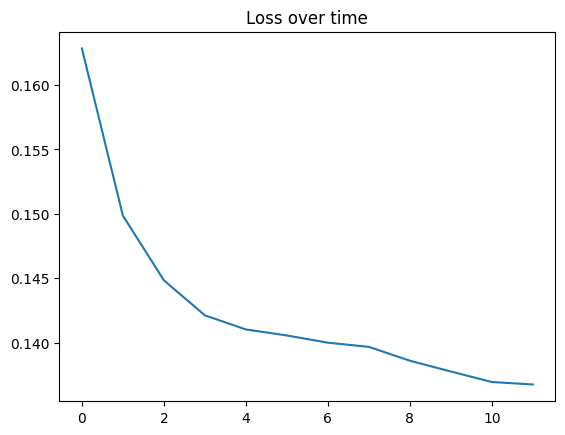

In [14]:
plt.plot(loss_trend)
plt.title('Loss over time')
plt.savefig('img/loss_denoiser3.png')

In [15]:
model.save('denoiser3.h5')